引入功能代码。

In [1]:
from functional_code import *

Using TensorFlow backend.
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yulongfeixue/opt

加载数据，展示表格。

In [5]:
training_data_fram = load_data('training_data.csv')
training_data_fram

Facies Facies Name Formation  Formation Index        Well Name   Depth  \
0          3        FSiS     A1 SH                2        SHRIMPLIN  2793.0   
1          3        FSiS     A1 SH                2        SHRIMPLIN  2793.5   
2          3        FSiS     A1 SH                2        SHRIMPLIN  2794.0   
3          3        FSiS     A1 SH                2        SHRIMPLIN  2794.5   
4          3        FSiS     A1 SH                2        SHRIMPLIN  2795.0   
...      ...         ...       ...              ...              ...     ...   
3227       5         MS       C LM               13  CHURCHMAN BIBLE  3120.5   
3228       5         MS       C LM               13  CHURCHMAN BIBLE  3121.0   
3229       5         MS       C LM               13  CHURCHMAN BIBLE  3121.5   
3230       5         MS       C LM               13  CHURCHMAN BIBLE  3122.0   
3231       5         MS       C LM               13  CHURCHMAN BIBLE  3122.5   

          GR  ILD_log10  DeltaPHI   PHIND     PE  NM_M  RELPOS  
0     77.450      0.664     9.900  11.915  4.600     1   1.000  
1     78.260      0.661    14.200  12.565  4.100     1   0.979  
2     79.050      0.658    14.800  13.050  3.600     1   0.957  
3     86.100      0.655    13.900  13.115  3.500     1   0.936  
4     74.580      0.647    13.500  13.300  3.400     1   0.915  
...      ...        ...       ...     ...    ...   ...     ...  
3227  46.719      0.947     1.828   7.254  3.617     2   0.685  
3228  44.563      0.953     2.241   8.013  3.344     2   0.677  
3229  49.719      0.964     2.925   8.013  3.190     2   0.669  
3230  51.469      0.965     3.083   7.708  3.152     2   0.661  
3231  50.031      0.970     2.609   6.668  3.295     2   0.653  

[3232 rows x 13 columns]

数据可视化：
1.录井数据随井深曲线；
2.特征多变量矩阵图。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


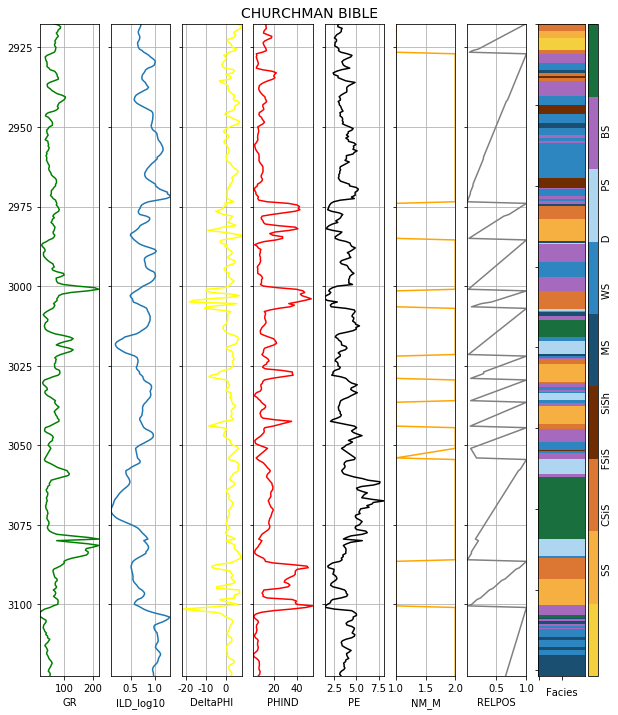

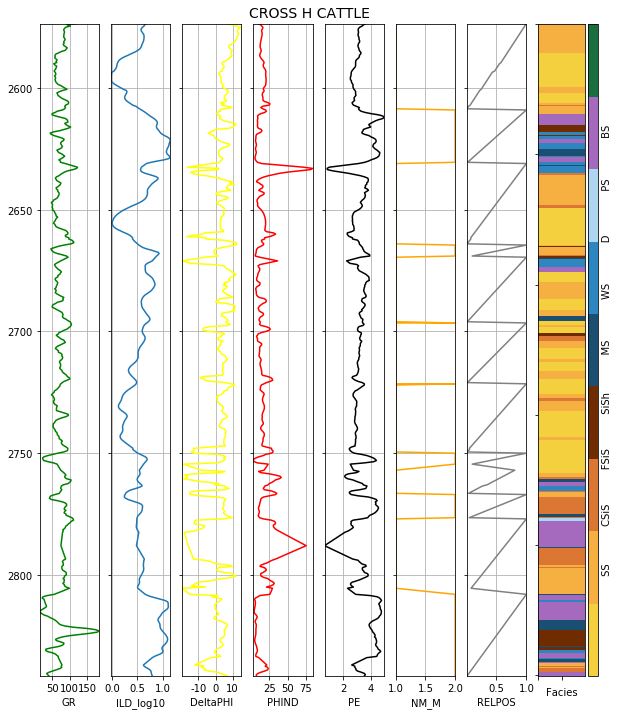

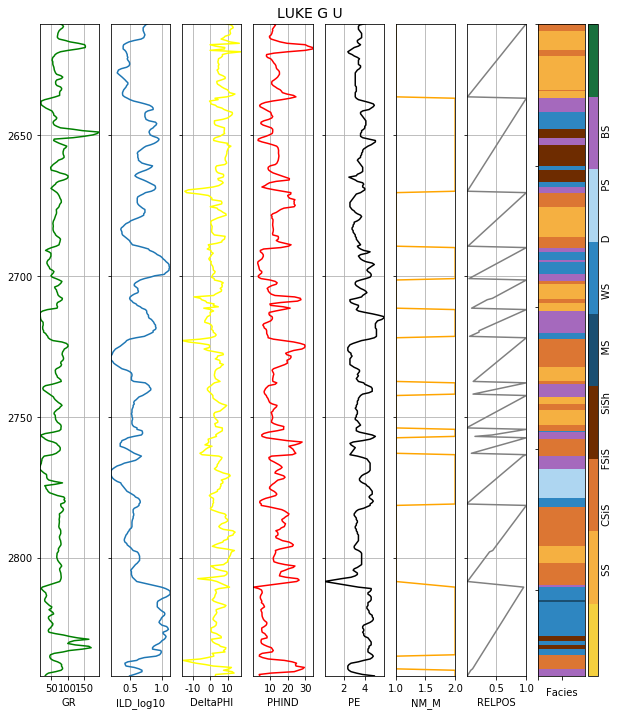

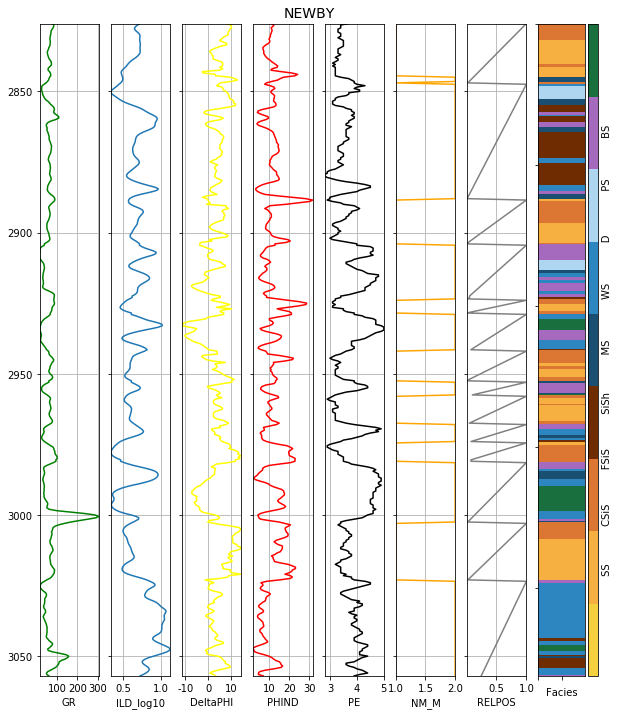

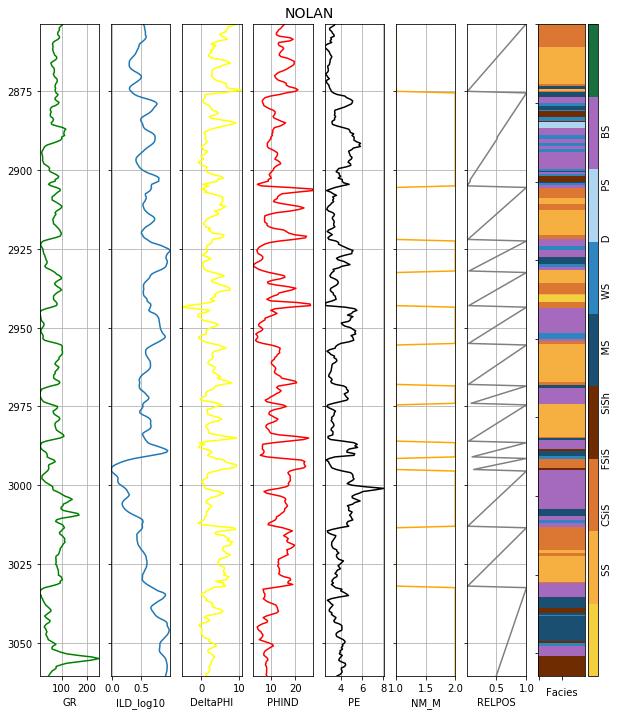

/Users/yulongfeixue/Desktop/论文代码/functional_code.py:60: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  ax[5].set_xlim(logs.NM_M.min(),logs.NM_M.max())


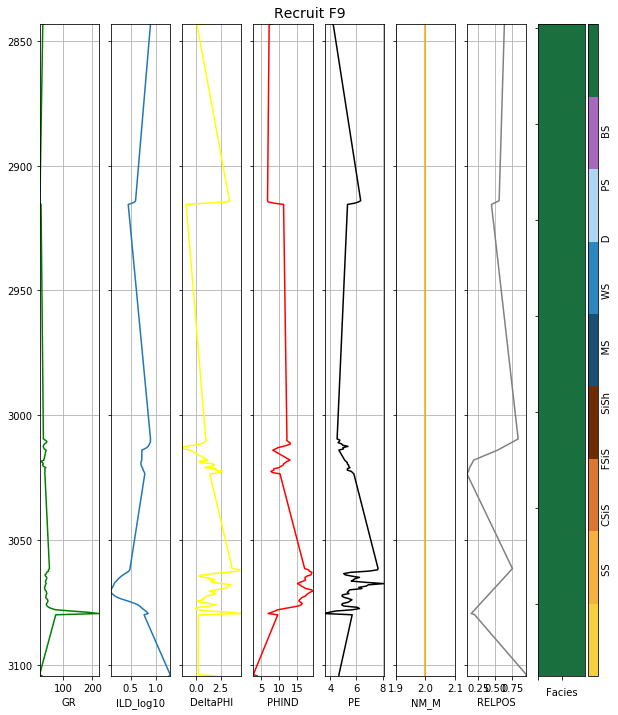

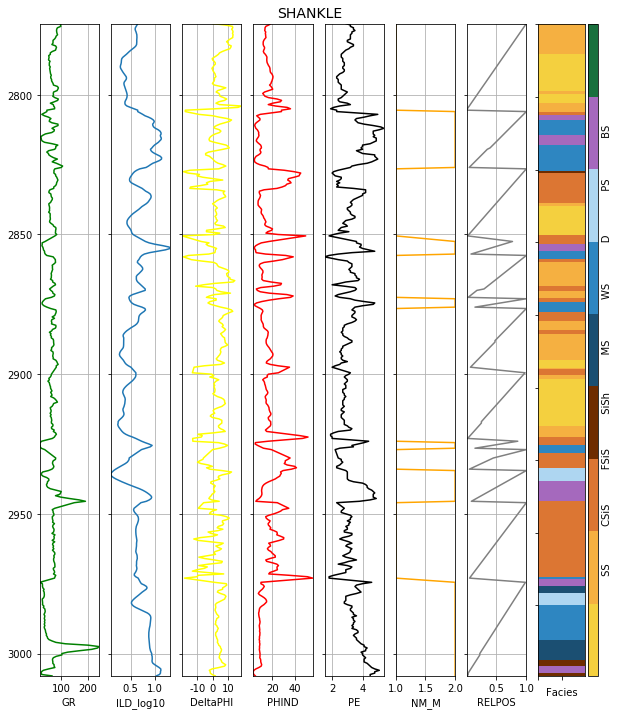

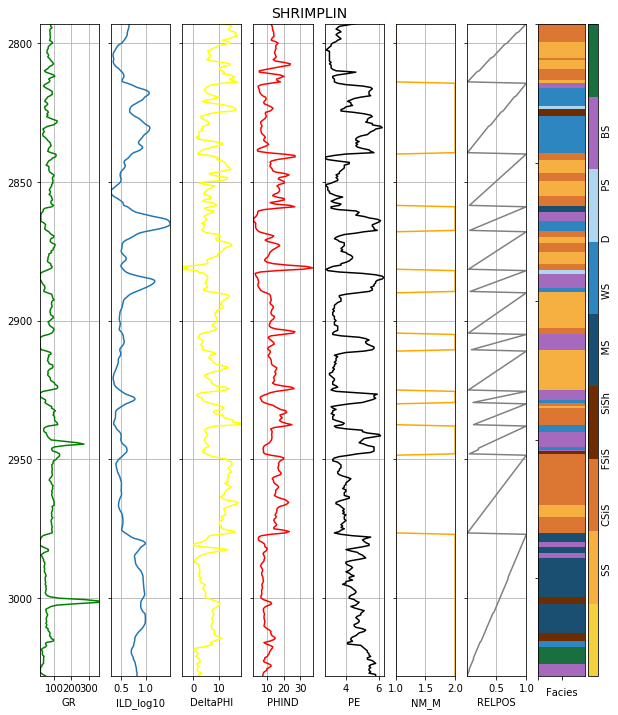

In [4]:
show_wells(training_data_fram)

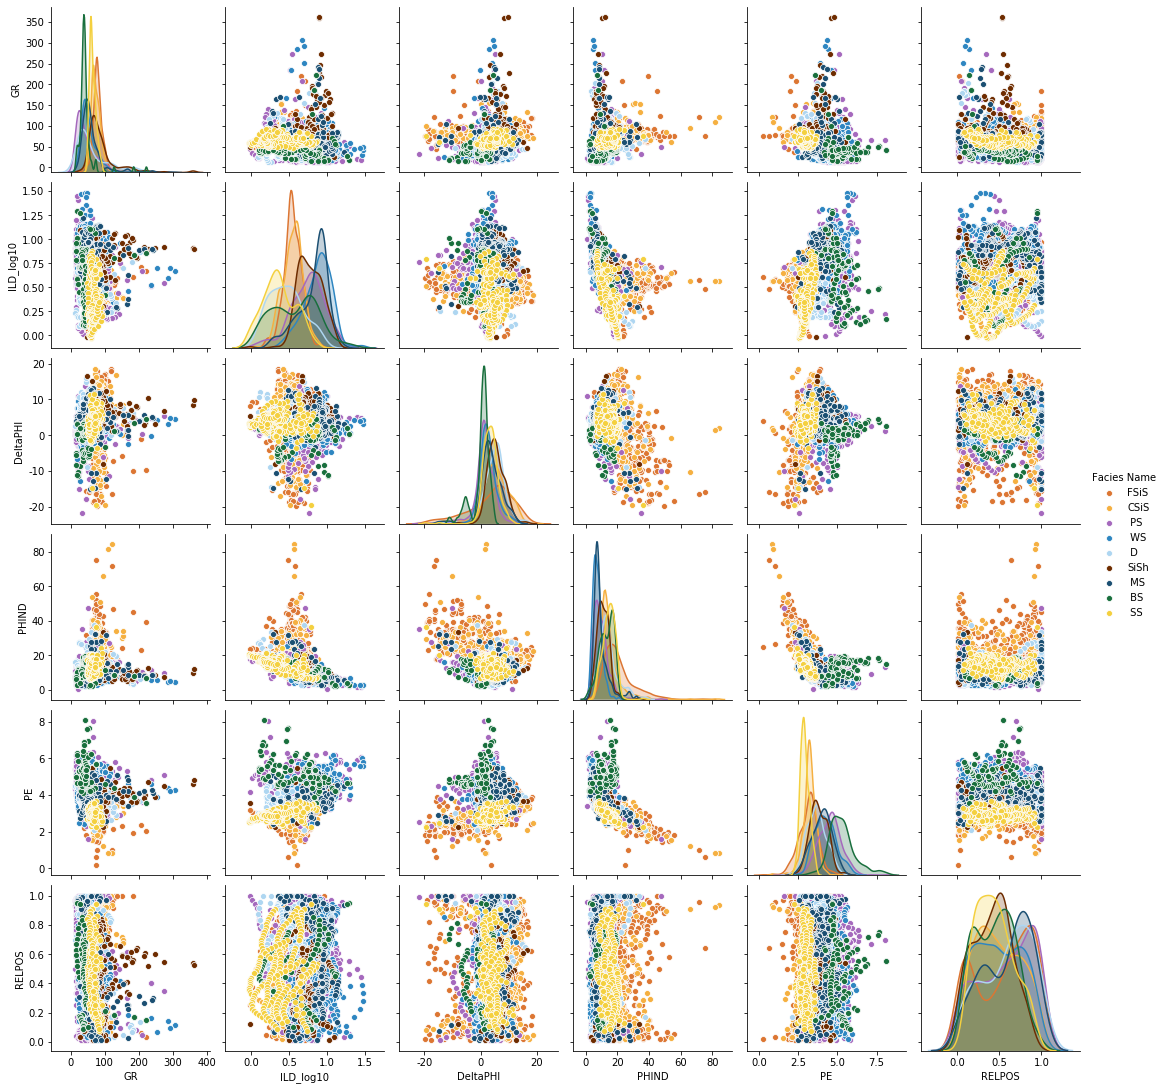

In [5]:
sns.pairplot(training_data_fram,
             vars = ['GR','ILD_log10','DeltaPHI','PHIND','PE','RELPOS'], 
             hue="Facies Name",
             palette = {' SS ': '#F4D03F','CSiS': '#F5B041','FSiS': '#DC7633','SiSh': '#6E2C00',' MS ': '#1B4F72',' WS ': '#2E86C1',' D  ': '#AED6F1',' PS ': '#A569BD',' BS ': '#196F3D'})

测试集训练集数据划分

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


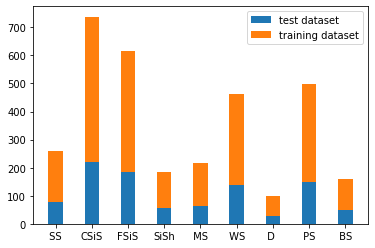

In [6]:
train_features,test_features,train_labels,test_labels = train_test_split_and_show(training_data_fram)

最简单朴素贝叶斯方法训练及结果展示

/Users/yulongfeixue/Desktop/论文代码/functional_code.py:446: RuntimeWarning: invalid value encountered in true_divide
  F1 = 2 * (precision * recall) / (precision + recall)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


     Pred   SS   CSiS  FSiS  SiSh   MS    WS    D     PS    BS  Total
     True
      SS     75     2     1                                        78
     CSiS   135    67    18                       1           1   222
     FSiS    61    63    55                 1     1           4   185
     SiSh     1                28          17     3           6    55
      MS      3           1     5          23     5     1    27    65
      WS      1                 5          79     2     1    51   139
      D                         6           3     2     2    16    29
      PS      1     1     1     2     1    49     5     1    88   149
      BS                        1                            47    48

Precision  0.27  0.50  0.72  0.60  0.00  0.46  0.11  0.20  0.20  0.42
   Recall  0.96  0.30  0.30  0.51  0.00  0.57  0.07  0.01  0.98  0.36
       F1  0.42  0.38  0.42  0.55  0.00  0.51  0.08  0.01  0.33  0.33


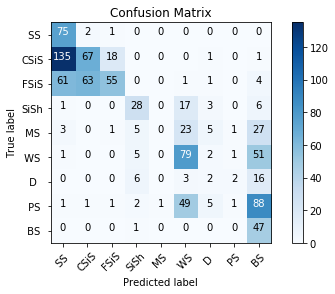

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


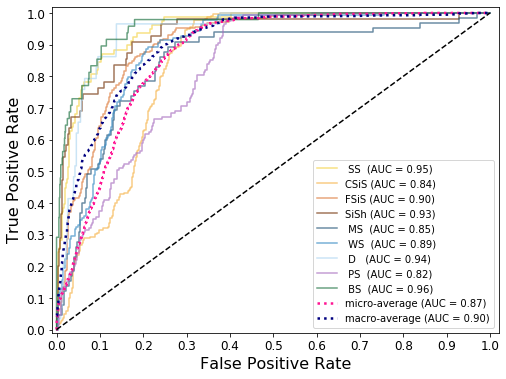

In [5]:
simple_nb_train_and_show_result(train_features,test_features,train_labels,test_labels)

特征分布用5个组份的高斯混合模型拟合效果展示

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


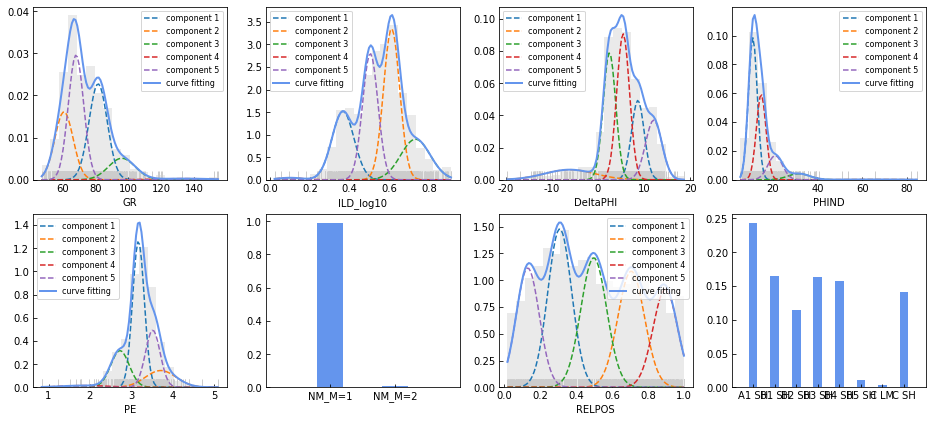

In [8]:
show_disribute_for_all_feature_in_on_facie(training_data_fram,2)

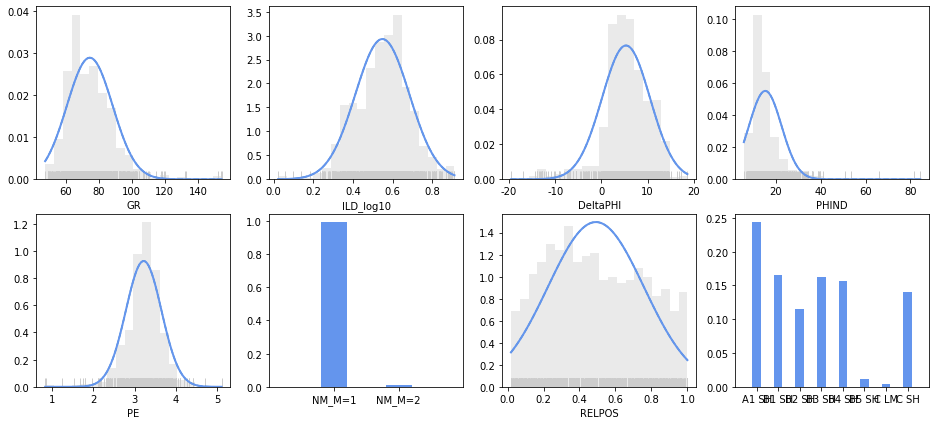

In [7]:
show_disribute_for_all_feature_in_on_facie(training_data_fram,2,n_components=1)

优化：特征分布用5个组份的高斯混合模型拟合。训练及结果展示。

     Pred   SS   CSiS  FSiS  SiSh   MS    WS    D     PS    BS  Total
     True
      SS     49    26     3                                        78
     CSiS    23   160    39                                       222
     FSiS     6    53   122     1     2                 1         185
     SiSh                      33     9    11           2          55
      MS            2     1     6    27    17     5     6     1    65
      WS                       14    18    73     1    28     5   139
      D                         2     2     1    16     6     2    29
      PS                  1     1     5    33     7    91    11   149
      BS                              1     4           6    37    48

Precision  0.63  0.66  0.73  0.58  0.42  0.53  0.55  0.65  0.66  0.63
   Recall  0.63  0.72  0.66  0.60  0.42  0.53  0.55  0.61  0.77  0.63
       F1  0.63  0.69  0.70  0.59  0.42  0.53  0.55  0.63  0.71  0.63


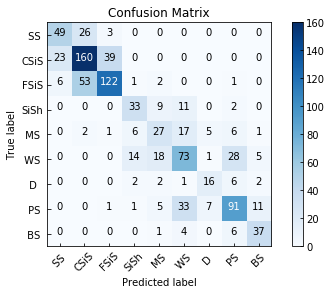

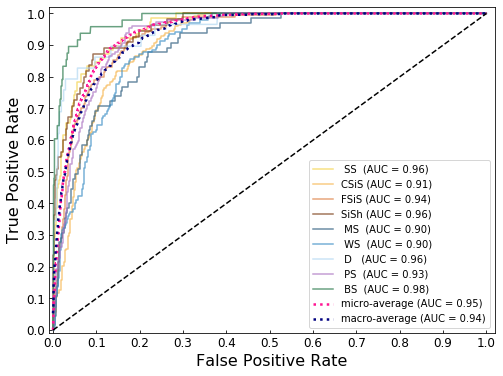

In [9]:
gmm_nb_and_show_result(train_features,test_features,train_labels,test_labels)

考虑了特征相互依赖，特征两两分组用高斯混合模型对各分组特征联合概率分布进行拟合，效果如下（5个高斯组份）：

/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


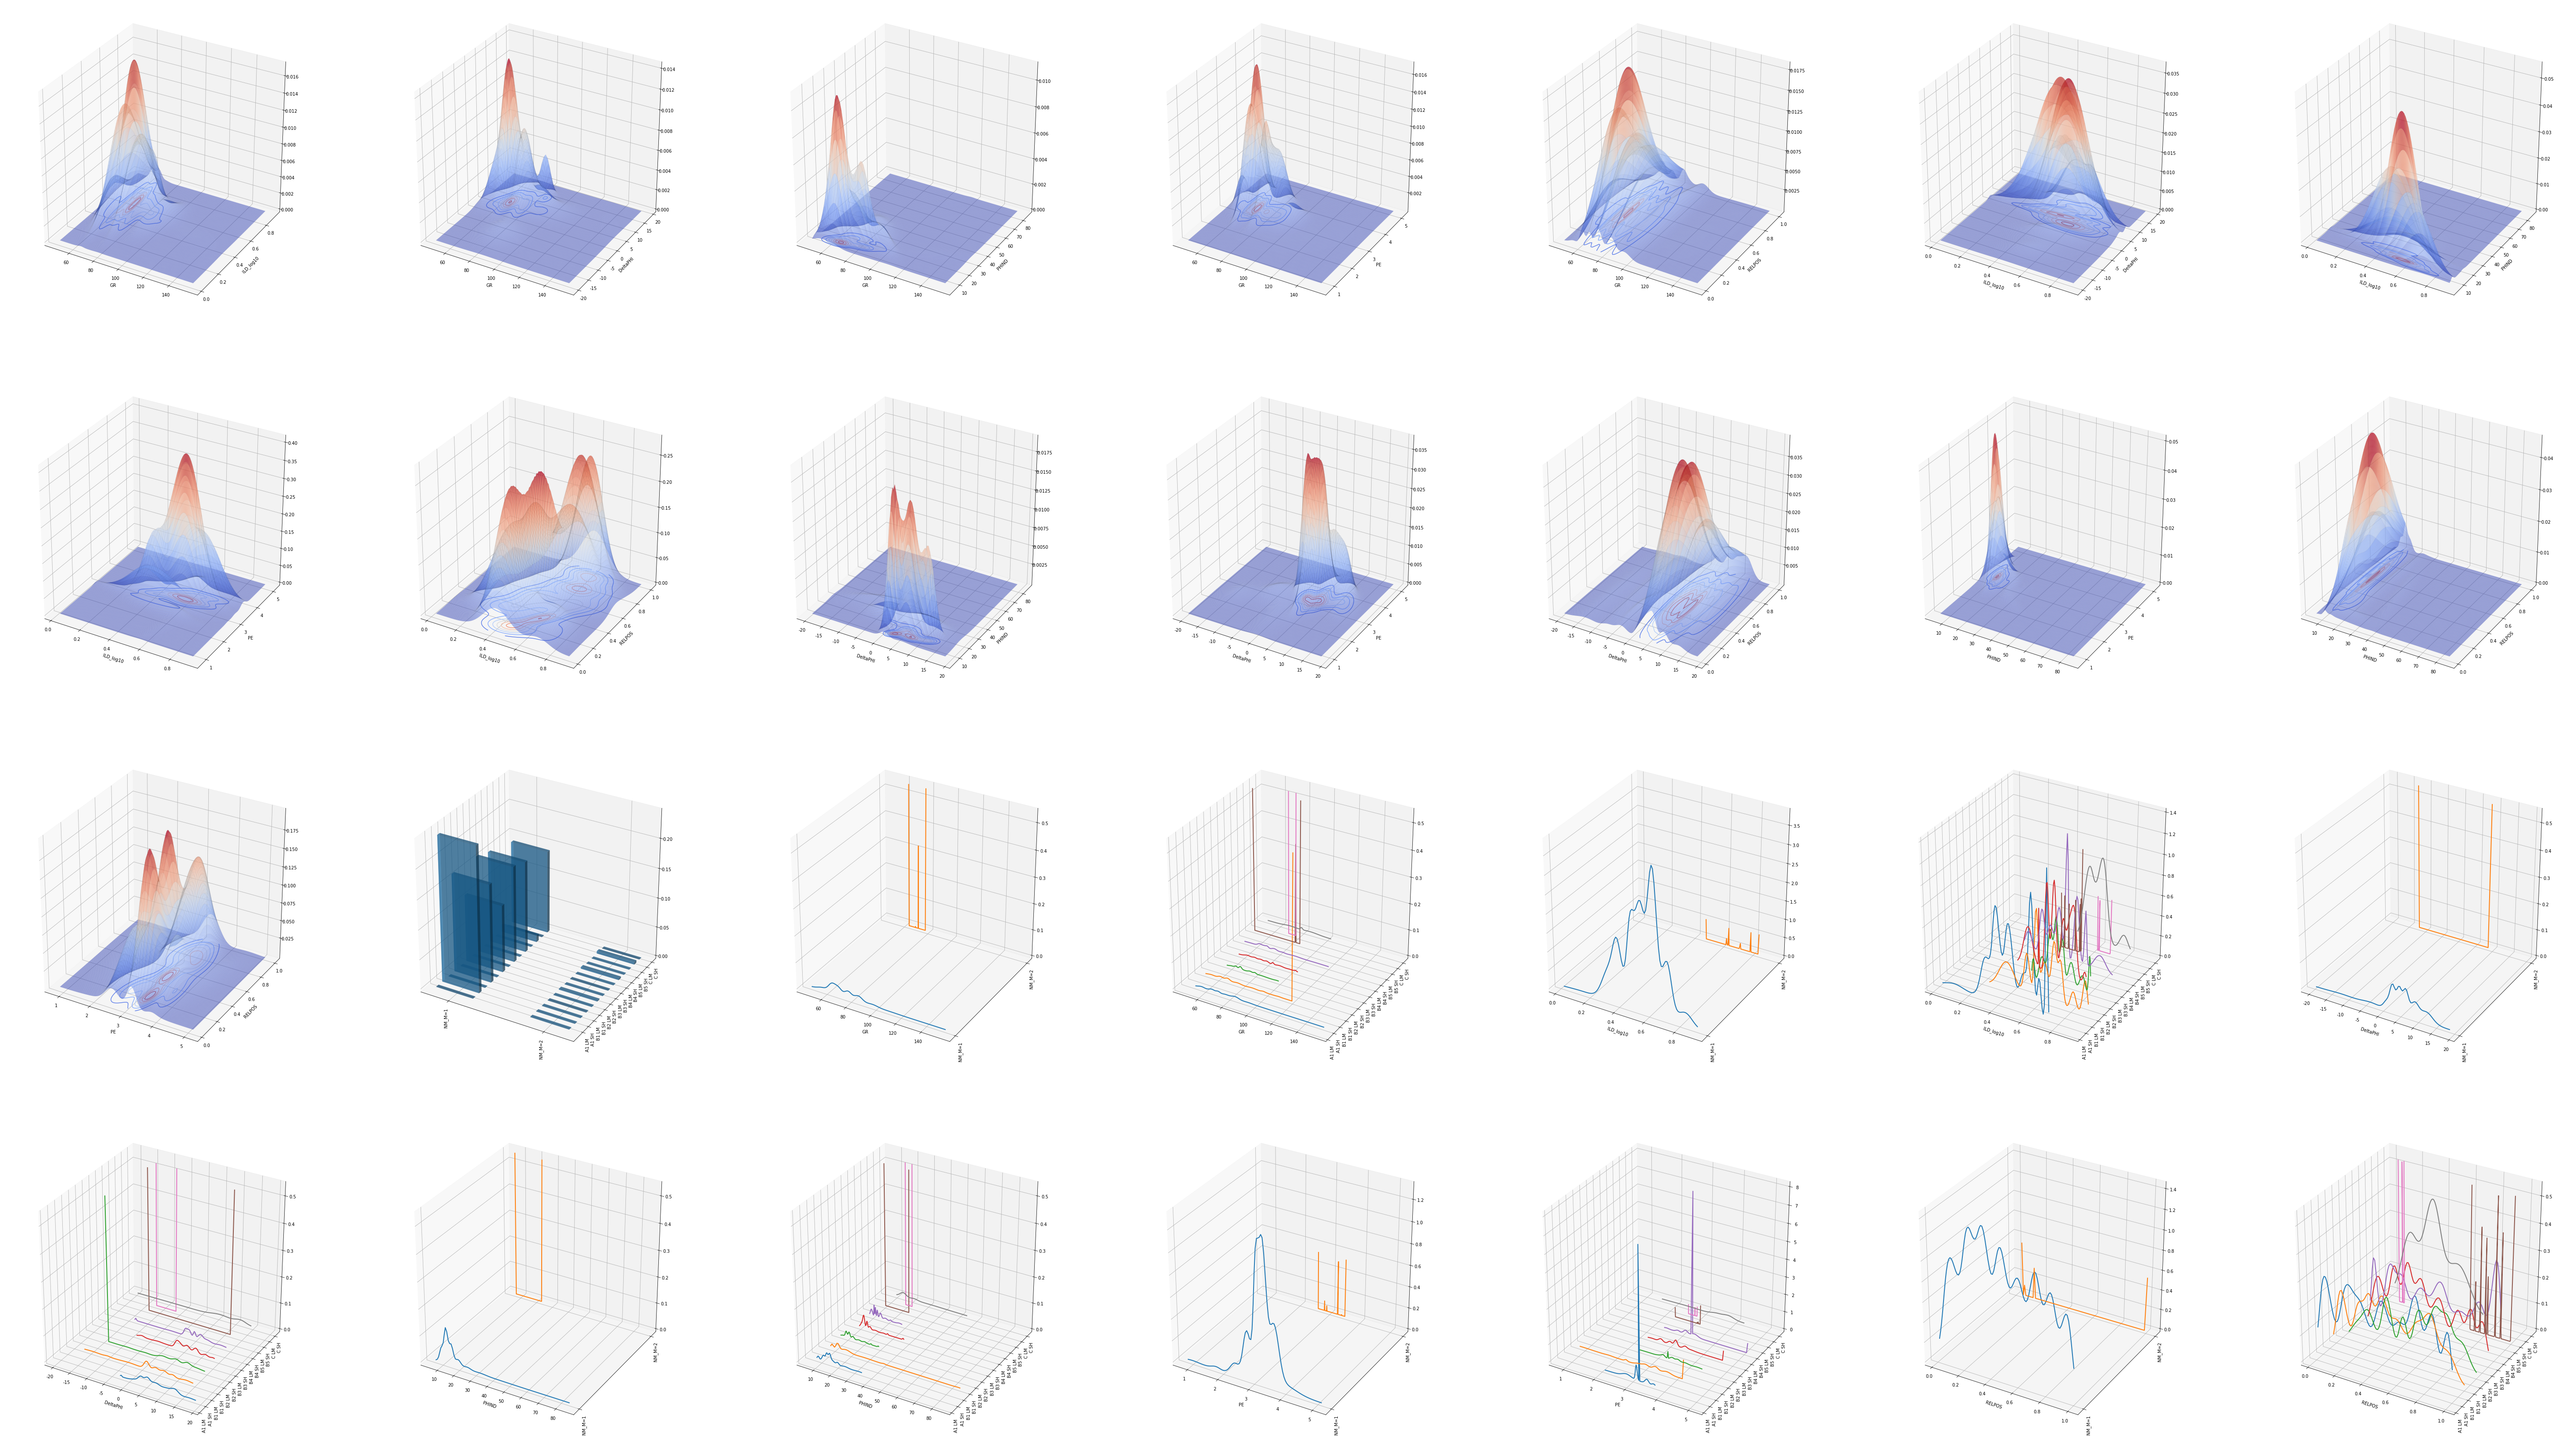

In [13]:
show_disribute_for_all_feature_group_in_on_facie(training_data_fram,2,n_components=8)

考虑了特征相互依赖，特征两两分组用高斯混合模型对各分组特征联合概率分布进行拟合，训练及结果展示（5个高斯组份）：

/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in

/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in

     Pred   SS   CSiS  FSiS  SiSh   MS    WS    D     PS    BS  Total
     True
      SS     52    23     3                                        78
     CSiS    19   161    41                             1         222
     FSiS     1    41   140     1                       2         185
     SiSh                      40     4     9           2          55
      MS      1     2           9    30    10          13          65
      WS                       10    12    79     1    36     1   139
      D                         2                14    11     2    29
      PS      2           1     2     3    20     5   111     5   149
      BS                                    2           7    39    48

Precision  0.69  0.71  0.76  0.62  0.61  0.66  0.70  0.61  0.83  0.69
   Recall  0.67  0.73  0.76  0.73  0.46  0.57  0.48  0.74  0.81  0.69
       F1  0.68  0.72  0.76  0.67  0.53  0.61  0.57  0.67  0.82  0.68


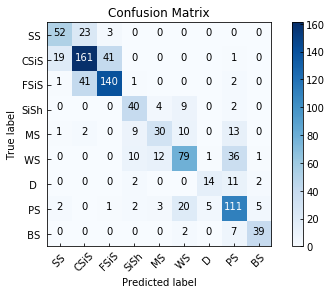

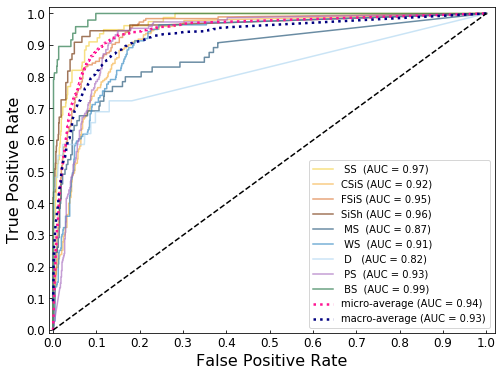

In [21]:
feature_group_bn_train_and_show_result(train_features,test_features,train_labels,test_labels,n_components=5)

In [8]:
g_fitting = FeatureGroupDataFitting(training_data_fram[training_data_fram['Facies']==2][['ILD_log10','PE']])

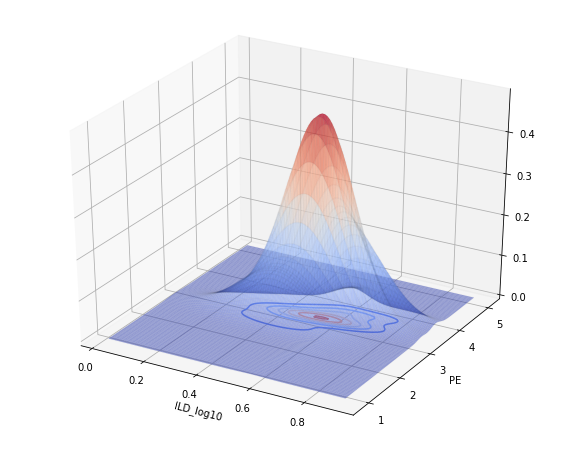

In [9]:
g_fitting.show_distribute()

     Pred   SS   CSiS  FSiS  SiSh   MS    WS    D     PS    BS  Total
     True
      SS     50    25     3                                        78
     CSiS    25   156    41                                       222
     FSiS     5    54   122     1     2     1                     185
     SiSh                      33    11     9           2          55
      MS            2     1     7    30    14     4     7          65
      WS                       14    11    82     1    28     3   139
      D                         3     1     1    17     5     2    29
      PS                  2     1     8    32     5    90    11   149
      BS                              1     5           5    37    48

Precision  0.62  0.66  0.72  0.56  0.47  0.57  0.63  0.66  0.70  0.64
   Recall  0.64  0.70  0.66  0.60  0.46  0.59  0.59  0.60  0.77  0.64
       F1  0.63  0.68  0.69  0.58  0.47  0.58  0.61  0.63  0.73  0.64


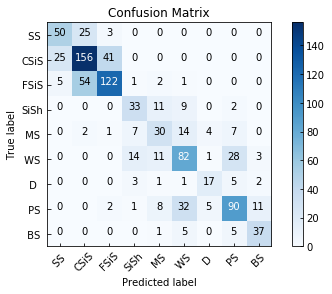

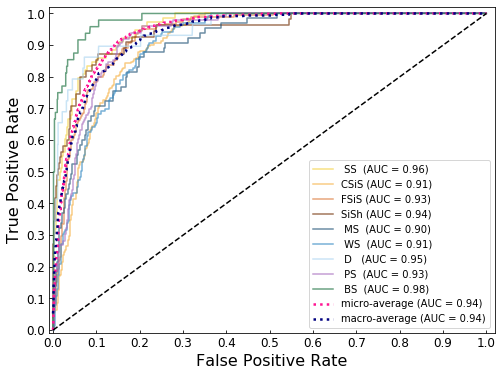

In [21]:
gmm_nb_and_show_result(train_features,test_features,train_labels,test_labels,n_components=6)

Text(0, 0.5, 'F1 Score')

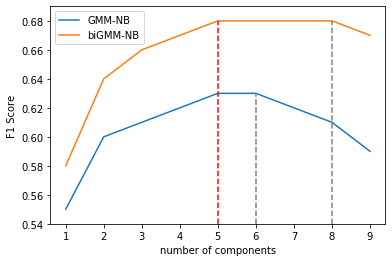

In [5]:
plt.plot([1,2,3,4,5,6,7,8,9],[0.55,0.6,0.61,0.62,0.63,0.63,0.62,0.61,0.59])
plt.plot([1,2,3,4,5,6,7,8,9],[0.58,0.64,0.66,0.67,0.68,0.68,0.68,0.68,0.67])
plt.legend(['GMM-NB','biGMM-NB'],loc = 0)
plt.plot([5,5],[0.54,0.68],'--',color='red')
plt.plot([6,6],[0.54,0.63],'--',color='grey')
plt.plot([8,8],[0.54,0.68],'--',color='grey')
plt.ylim(0.54,0.69)
plt.xlabel('number of components')
plt.ylabel('F1 Score')

/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points i

/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/Users/yulongfeixue/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in

     Pred   SS   CSiS  FSiS  SiSh   MS    WS    D     PS    BS  Total
     True
      SS     40    35     3                                        78
     CSiS     9   162    50                             1         222
     FSiS     3    38   141                             3         185
     SiSh     3                38     4     7           3          55
      MS      2     2           9    26    15          11          65
      WS      2                 9    11    72     1    44         139
      D                         3                12    12     2    29
      PS      2           1     1     4    19     2   119     1   149
      BS                                    2           5    41    48

Precision  0.66  0.68  0.72  0.63  0.58  0.63  0.80  0.60  0.93  0.67
   Recall  0.51  0.73  0.76  0.69  0.40  0.52  0.41  0.80  0.85  0.67
       F1  0.58  0.71  0.74  0.66  0.47  0.57  0.55  0.69  0.89  0.67


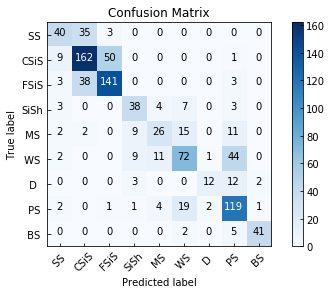

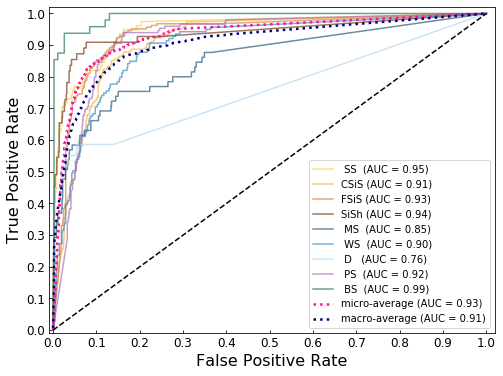

In [35]:
feature_group_bn_train_and_show_result(train_features,test_features,train_labels,test_labels,n_components=10)

Text(0, 0.5, 'F1 Score')

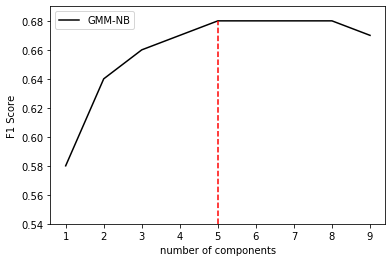

In [5]:

plt.plot([1,2,3,4,5,6,7,8,9],[0.58,0.64,0.66,0.67,0.68,0.68,0.68,0.68,0.67],color='black')
plt.legend(['GMM-NB','biGMM-NB'],loc = 0)
plt.plot([5,5],[0.54,0.68],'--',color='red')


plt.ylim(0.54,0.69)
plt.xlabel('number of components')
plt.ylabel('F1 Score')

Text(0, 0.5, 'F1 Score')

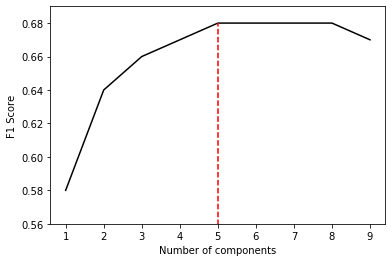

In [9]:

plt.plot([1,2,3,4,5,6,7,8,9],[0.58,0.64,0.66,0.67,0.68,0.68,0.68,0.68,0.67],color='black')

plt.plot([5,5],[0.54,0.68],'--',color='red')


plt.ylim(0.56,0.69)
plt.xlabel('Number of components')
plt.ylabel('F1 Score')